# Dopasowanie par sekwencji. Algorytm kropkowy.

## Spis treści

1. Schemat blokowy algorytmu
2. Funkcje i kod źródłowy
    1. Wczytanie sekwencji możliwie przynajmniej na dwa różne sposoby:
        1. Wczytanie sekwencji przy użyciu pliku w formacie FASTA
        2. Wczytanie sekwencji ręcznie
    2. Wygenerowanie macierzy kropkowej (ang. *dot plot*) w postaci 2-wymiarowej tablicy
    3. Filtrowanie macierzy kropkowej dla zadanego rozmiaru okna i progu filtra
    4. Wyświetlenie macierzy kropkowej w postaci graficznej
    5. Zapis otrzymanej macierzy do pliku graficznego wraz z parametrami filtracji
3. Porównanie przykładowych par sekwencji ewolucyjnie
    1. Powiązanych
    2. Niepowiązanych
4. Interpretacja macierzy kropkowej dla przykładowych par.

## 1. Schemat blokowy algorytmu

![](https://i.imgur.com/lzZQOT5.png)

## 2. Funkcje i kod źródłowy

1. Wczytanie sekwencji możliwie przynajmniej na dwa różne sposoby:


    a) Wczytanie sekwencji przy użyciu pliku w formacie FASTA

In [1]:
# Convering FASTA file sequence to String
# Args: filename (String) - path to FASTA file
# Returns: bialko (String) - protein sequence
# Computational complexity: O(n)
def readProtein(fileName):
    file = open(fileName, 'r')
    i = 0
    bialko = ''
    for each in file:
        if i !=0: 
            bialko += each
        i+=1
    return bialko.replace("\n" , "")
   

     b) Wczytanie sekwencji ręcznie

In [2]:
# Check if provided String contains only DNA sequence
# Args: dna (String) - dna sequence
# Returns: boolean - if provided dna sequence is dna
# Computational complexity: O(n^2)
def ifDna(dna):
    return not len(tuple(filter(lambda letter: letter.upper() not in ('A','G','C','T'), dna)))

In [3]:
# Manualy input dna sequence an check if data is correct
# Args: 
# Returns: data (string) - dna sequence
def inputDna():
    data = input("Please provide a squence of DNA: ") 
    if ifDna(data):
        return data.upper()
    else:
        print ("Wrong dna provided!")

2. Wygenerowanie macierzy kropkowej (ang. *dot plot*) w postaci 2-wymiarowej tablicy

In [4]:
import numpy as np

# Makes 2 dimentions array of dotPlot for provided strings
# Args: protein1 (String) - first String to compare
#       protein2 (String) - second String to compare
# Computational complexity: O(n^2+2n)
def makeDotPlot(protein1, protein2):
    output = np.zeros((len(protein1),len(protein2)))
    prot1 = []
    prot2 = []
    
    for letter in protein1:
        prot1.append(letter)
        
    for letter in protein2:
        prot2.append(letter)
        
    n = 0
    m = 0
    while n < len(prot1):
        m=0
        while m < len(prot2):
            if (prot1[n] == prot2[m]):
                output[n][m] = 1
            m+=1
        n+=1
    return output

3. Porównanie przykładowych par sekwencji ewolucyjnie

In [16]:
# Function that filters dotPlot (arrays of 1 and 0) with desired window size and treshold.
# Args: array (np.Array) - array of data made by makeDotPlot() 
#       windowSize (int) - size of window
#       treshold (int) - treshold of window
# Returns arrayCopy (np.Array) - a copy of orginal array with filters applied
# Computational complexity: O(n^3)
def filterDotPlot(array, windowSize, treshold):
    #Ilość przekątnych od (len(protein2)-1 : len(protein1)-1)
    print(array)
    arrayCopy = array.copy()
    for i in range(-(arrayCopy.shape[1]-1), arrayCopy.shape[0]):
        #W długości diagonali
        for n in range(len(arrayCopy.diagonal(i))):
            #Jeżeli windowSize przekracza długość diagonali
            if (n+windowSize)>len(arrayCopy.diagonal(i)):          
                if sum(arrayCopy.diagonal(i)[n:len(arrayCopy.diagonal(i)-1)])<treshold:
                    if i<0:
                        arrayCopy[-i+n,0+n] = 0
                    else:
                        arrayCopy[0+n,i+n ] = 0
            else:
                if sum(arrayCopy.diagonal(i)[n:n+windowSize])<treshold:
                    if i<0:
                        arrayCopy[-i+n,0+n] = 0
                    else:
                        arrayCopy[0+n,i+n ] = 0
    return arrayCopy

4. Wyświetlenie macierzy kropkowej w postaci graficznej

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap

# Function that draws dotPlot for numpy array
# Args: array (numpy.Array) - array of data done by makeDotPlot
#       protein1 (String) - labels top axis
#       protein2 (String) - labels bottom axis
# Computational complexity: O(n^2)
def makeHeatmap(array, protein1 = None, protein2 = None, windowSize = None, treshold = None):
#     return heatmap(array, cmap='YlGnBu', xticklabels=protein1, yticklabels=protein2)
    sns.set()
    fig = plt.figure(figsize=(len(protein2)/5, len(protein1)/5))
    ax = sns.heatmap(array, cmap='YlGnBu', xticklabels=protein2, yticklabels=protein1)
    plt.yticks(rotation=0)
    if windowSize is not None and treshold is not None:
        plt.xlabel('Window size: ' + str(windowSize) + '\n' + 'Treshold: ' + str(treshold), fontsize = 23)
    ax.xaxis.tick_top()
    return fig

5. Zapis otrzymanej macierzy do pliku graficznego wraz z parametrami filtracji

In [7]:
# Function that allows user to save figure to desired filename
# Args: filename (String) - name of .png file
#       fig (plt.figure() obj) - figure object
# 
def saveDotPlotToFile(filename, fig):
    fig.savefig(filename + ".png")

## 3. Porównanie przykładowych par sekwencji ewolucyjnie

### A. Powiązanych

In [8]:
protein1 = readProtein('Influenza.fasta')
protein2 = readProtein('flu2.fasta')
dotPlot = makeDotPlot(protein1, protein2)
filtered = filterDotPlot(dotPlot, 4, 2)

Przed filtracją


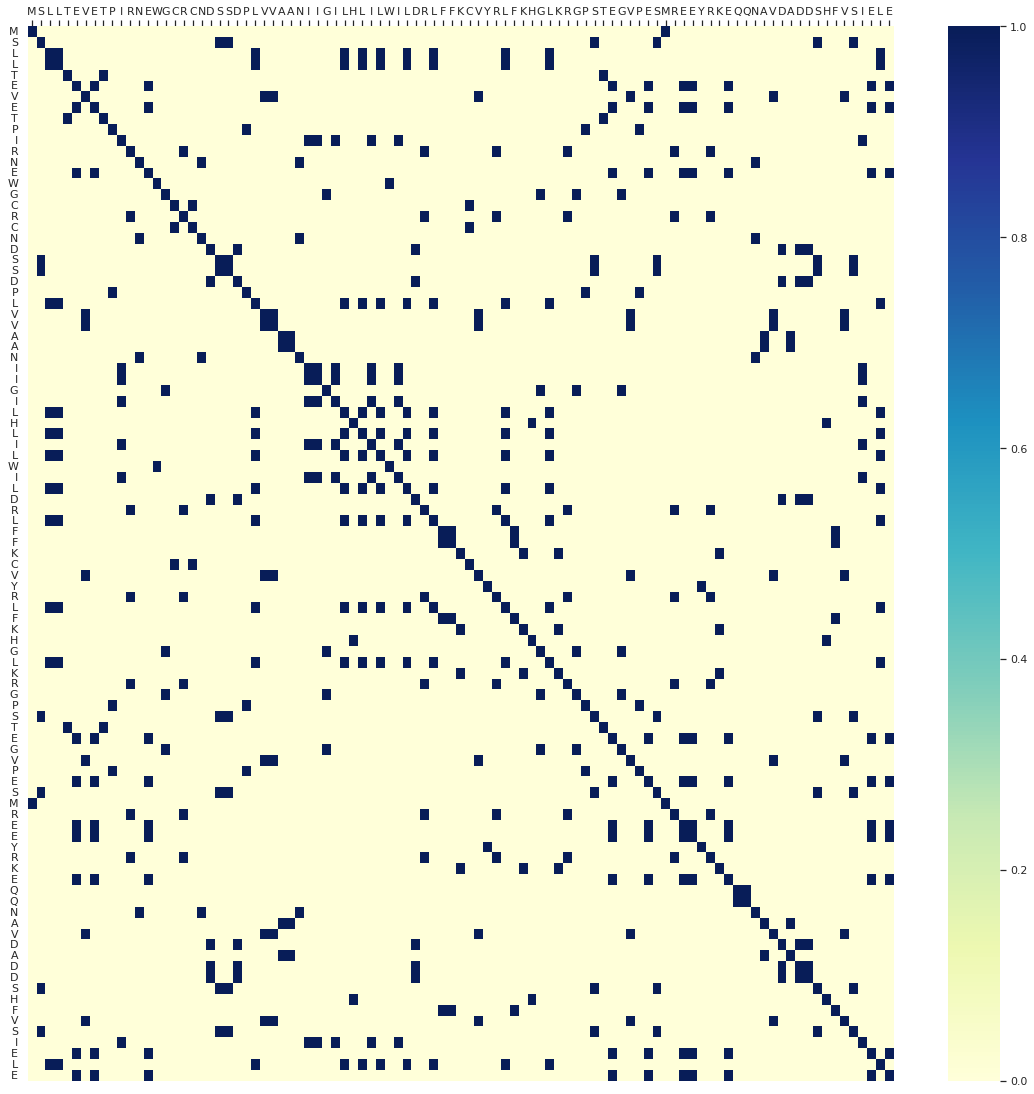

In [9]:
print("Przed filtracją")
przed = makeHeatmap(dotPlot, protein1, protein2) #Przed filtracja


Po filtracji


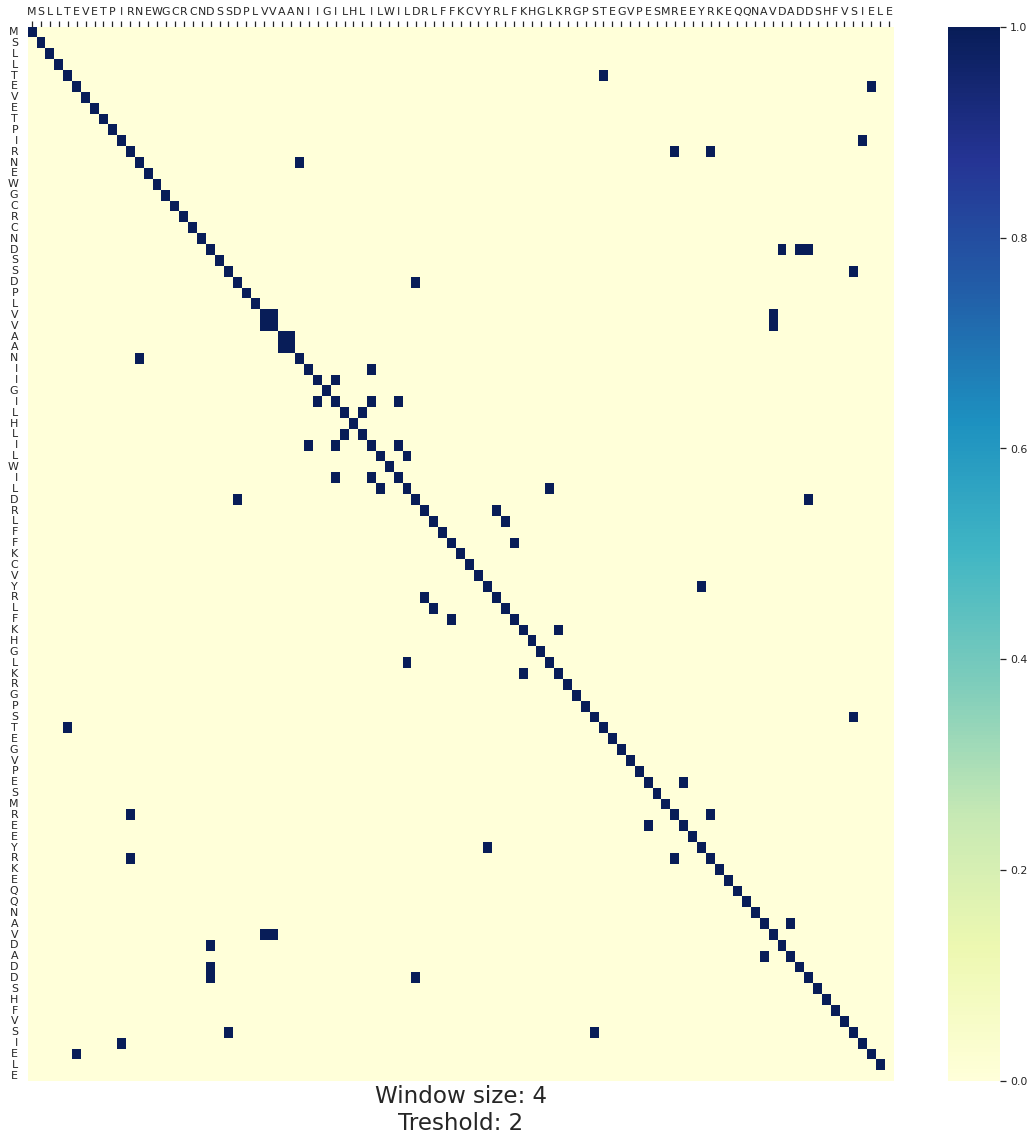

In [10]:
print("Po filtracji")
po = makeHeatmap(filtered, protein1, protein2, 4, 2) #Po filtracji 

In [11]:
#Zapis do pliku
saveDotPlotToFile("powiazane_przed_filtracja", przed)
saveDotPlotToFile("powiazane_po_filtracja", po)

### B. Niepowiązanych

In [17]:
dna1 = inputDna()
dna2 = inputDna()
dotPlot2 = makeDotPlot(dna1, dna2)
filtered2 = filterDotPlot(dotPlot2, 3, 2)

Please provide a squence of DNA: acgtca
Please provide a squence of DNA: cagtaca
[[0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1.]]


Przed filtracją


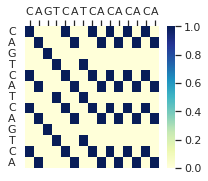

In [13]:
print("Przed filtracją")
przed2 = makeHeatmap(dotPlot2, dna1, dna2) #Przed filtracja

Po filtracji


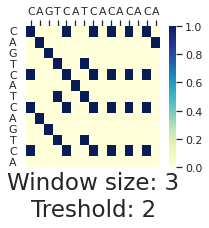

In [14]:
print("Po filtracji")
po2 = makeHeatmap(filtered2, dna1, dna2, 3, 2) #Po filtracji 

In [15]:
#Zapis do pliku
saveDotPlotToFile("niepowiazane_przed_filtracja", przed2)
saveDotPlotToFile("niepowiazane_po_filtracja", po2)

## 4. Interpretacja macierzy kropkowej dla przykładowych par.

4.1 Analiza porównawcza sekwencji par powiązanych

   Wykres otrzymany przy pomocy powyższego programu dla zmiennej *dotPlot* dla par powiązanych wyraźnie wskazuje na to, że wczytane pary są do siebie podobne - wynika to z faktu, że po przekątnej na uzyskanym wykresie uzyskano linię. Poza samą przekątną otrzymano również szum, jednakże nie utrudnia on analizy wprowadzonych sekwencji aminokwasów.
   Filtrowanie jest bardzo pomocne w celu usunięcia szumów tła pozostawiając na wykresie tylko takie wartości, które spełniły wymagania zadane podczas filtracji (tj. próg i okno). Pomaga to w analizie podobieństwa łańcuchów.

4.2 Analiza porównawcza sekwencji par niepowiązanych 

   Natomiast analizując wykres *dotPlot2* otrzymany dla różnych sekwencji DNA zauważono, że najdłuższa podobna sekwencja (po przekątnej) wynosiła 3. Wskazuje to, że podane sekwencje nie są do siebie podobne.
   Niestety filtracja krótkich łańcóchów ma parę wad, ustawienei zbyt dużego okna i progu powoduje usunięcie sporej części danych na końcu macierzy kropkowej - wynika to ze zmniejszania okna gdy wykracza ona poza zakres przekątnej. 